<a href="https://colab.research.google.com/github/TyllerDaniel/image_classification_fastai/blob/main/fastai_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade



     |████████████████████████████████| 194kB 10.0MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


NameError: ignored

In [2]:
import fastai
import torch
from fastai.vision.all import *
from torch.utils.data import Dataset, DataLoader
path = untar_data(URLs.PETS)/'images'

def is_cat(x): 
  return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path,get_image_files(path),
    valid_pct = 0.2, seed =42,
    label_func = is_cat,  item_tfms = Resize(224)
    )

learn = cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.169072,0.021773,0.006766,36:29


epoch,train_loss,valid_loss,error_rate,time
0,0.050468,0.031260,0.008796,51:44


In [4]:
from google.colab import files
uploaded = files.upload()

Saving cat1.jpg to cat1.jpg


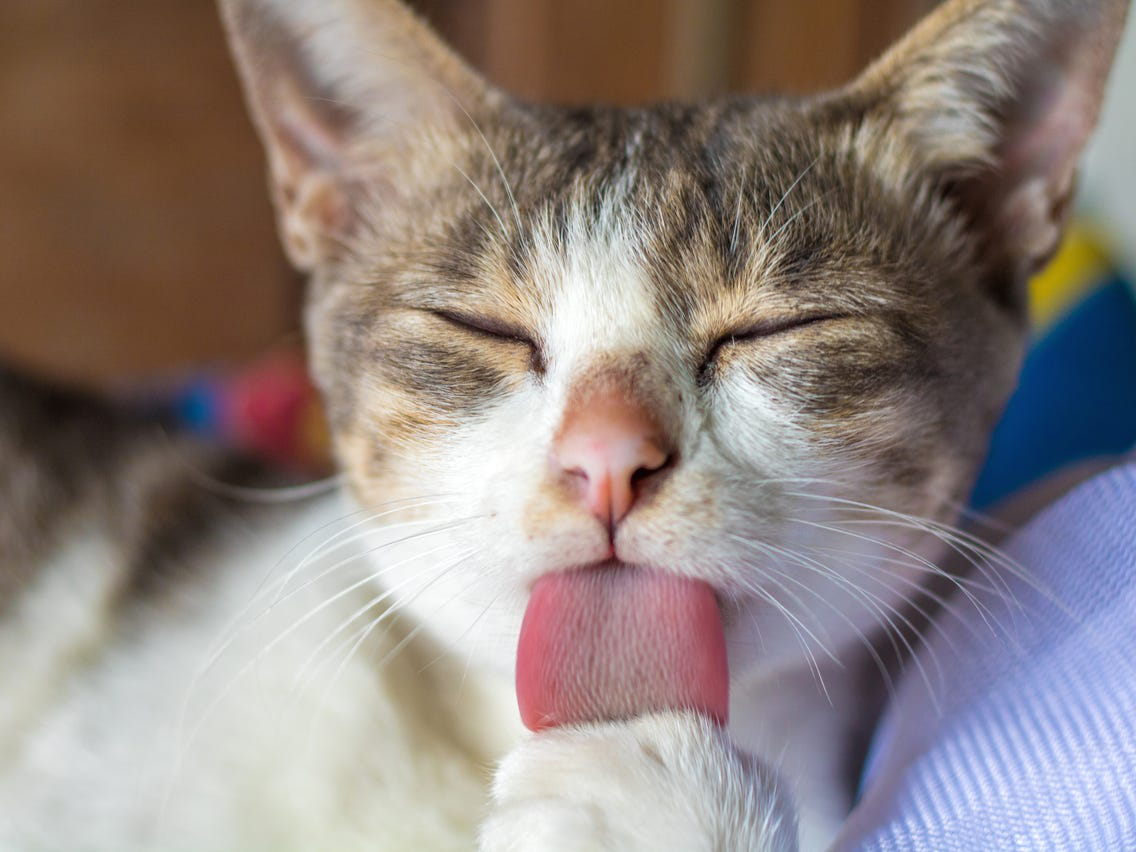

In [14]:
from io import BytesIO
img = Image.open(BytesIO(uploaded['cat1.jpg']))


In [25]:
import matplotlib.pyplot as plt
img = plt.imread('cat1.jpg')


In [26]:
is_cat,_ ,probs = learn.predict(img)
print(f"Is this a cat ?: {is_cat}")
print(f"Probability is's a cat: {probs[1].item()}:.6f")

Is this a cat ?: True
Probability is's a cat: 1.0:.6f
